In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
Xtrain = np.load("C:/Users/User/ML/Video_Forgery_Detection/video_tampering_dataset/Xtrain.npy")
Ytrain = np.load("C:/Users/User/ML/Video_Forgery_Detection/video_tampering_dataset/Ytrain.npy")

In [3]:
print(Xtrain.shape)
print(Ytrain.shape)

(3500, 240, 320, 3)
(3500,)


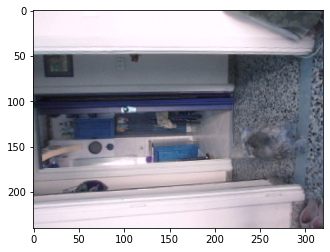

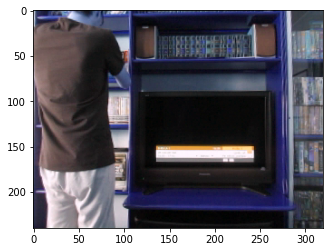

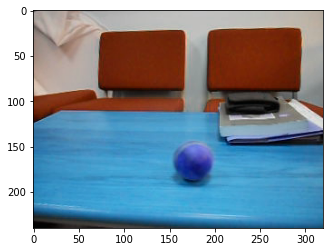

In [4]:
for i in range(3):
    r = np.random.randint(Xtrain.shape[0])
    plt.imshow(Xtrain[r])
    plt.show()

# Resnet Model

In [5]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.optimizers import Adam

# Keras API
from keras.models import Model

In [6]:
model = ResNet50(input_shape=(240,320,3),include_top=False,weights='imagenet')

In [7]:
dr = Dropout(0.2)(model.output)
gap1 = GlobalAveragePooling2D()(dr)
fc1 = Dense(64,activation='relu')(gap1)
fc2 = Dense(1,activation='sigmoid')(fc1)

In [8]:
model_new = Model(inputs=model.input,outputs=fc2)

In [9]:
#for ix in range(len(model_new.layers)):
    #print(ix,model_new.layers[i])

In [10]:
#for ix in range(171):
    #model_new.layers[ix].trainable= False

In [11]:
model_new.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 320, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 326, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 120, 160, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 120, 160, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

conv4_block6_3_conv (Conv2D)    (None, 15, 20, 1024) 263168      conv4_block6_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block6_3_bn (BatchNormali (None, 15, 20, 1024) 4096        conv4_block6_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block6_add (Add)          (None, 15, 20, 1024) 0           conv4_block5_out[0][0]           
                                                                 conv4_block6_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_out (Activation)   (None, 15, 20, 1024) 0           conv4_block6_add[0][0]           
__________________________________________________________________________________________________
conv5_block1_1_conv (Conv2D)    (None, 8, 10, 512)   524800      conv4_block6_out[0][0]           
__________

In [12]:
adam = Adam(lr=1e-4)

model_new.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint

In [14]:
checkpoint = ModelCheckpoint("C:/Users/User/ML/Video_Forgery_Detection/ResNet50_Model/forgery_model.hdf5",save_best_only=True)

hist = model_new.fit(Xtrain,Ytrain,batch_size=32,epochs=12,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/5
88/88 [==============================] - 6513s 74s/step - loss: 0.5070 - accuracy: 0.7539 - val_loss: 0.4265 - val_accuracy: 0.7929
Epoch 2/5
88/88 [==============================] - 6731s 76s/step - loss: 0.4442 - accuracy: 0.7689 - val_loss: 0.4276 - val_accuracy: 0.7971
Epoch 3/5
88/88 [==============================] - 4093s 47s/step - loss: 0.4215 - accuracy: 0.7779 - val_loss: 0.4090 - val_accuracy: 0.7729
Epoch 4/5
88/88 [==============================] - 7718s 88s/step - loss: 0.4117 - accuracy: 0.7693 - val_loss: 0.4516 - val_accuracy: 0.7771
Epoch 5/5
88/88 [==============================] - 7255s 82s/step - loss: 0.4058 - accuracy: 0.7732 - val_loss: 0.4211 - val_accuracy: 0.7814
